# 1.Introduction

This notebook contains the development of my final work for bachelor's degree in Computer Engineering at Federal University of Rio Grande do Norte. It contains a exploratory data analysis of the database of residents of the state of Rio Grande do Norte that attended to ENEM, the High School National Exam, a national exam that allows students to enter public and federal universities, and also evaluates the performance of the high school around the country.

In this notebook, we will study the performance of the students in Rio Grande do Norte, a state of the Northeast in Brazil. We will take a look at various featuras and indicators to make local managers of education have a visual tool to ease the decision making of the next steps of the state's education.

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
_ = sns.set_style("darkgrid")

educ = pd.read_csv('./data/enem_rn_2017.csv', sep=';', encoding='ISO-8859-1')
print(educ.head())

   Unnamed: 0  Unnamed: 0.1  NU_INSCRICAO  NU_ANO  CO_MUNICIPIO_RESIDENCIA  \
0           0            32  170003127880    2017                  2405207   
1           1            33  170006483595    2017                  2405801   
2           2            65  170003127896    2017                  2403251   
3           3            73  170001415750    2017                  2400208   
4           4           169  170001417217    2017                  2408102   

  NO_MUNICIPIO_RESIDENCIA  CO_UF_RESIDENCIA SG_UF_RESIDENCIA  NU_IDADE  \
0                 Janduís                24               RN      17.0   
1             João Câmara                24               RN      22.0   
2              Parnamirim                24               RN      28.0   
3                     Açu                24               RN      26.0   
4                   Natal                24               RN      39.0   

  TP_SEXO  ...   Q018  Q019  Q020  Q021 Q022  Q023 Q024  Q025  Q026  Q027  
0       F 

In [21]:
grade_cols = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']

grades = educ[grade_cols].dropna()

print(grades.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109400 entries, 0 to 159075
Data columns (total 4 columns):
NU_NOTA_CN    109400 non-null float64
NU_NOTA_CH    109400 non-null float64
NU_NOTA_LC    109400 non-null float64
NU_NOTA_MT    109400 non-null float64
dtypes: float64(4)
memory usage: 4.2 MB
None


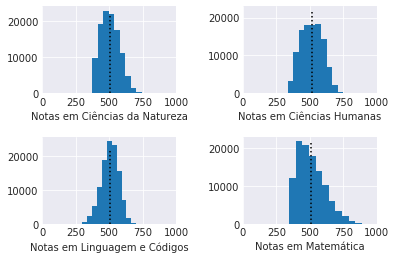

In [79]:
#Plotando os gráficos das distribuições de média
bins = 20

plt.subplot(2, 2, 1)
plt.hist(grades['NU_NOTA_CN'], bins=bins)
plt.xlabel('Notas em Ciências da Natureza')
plt.xlim(0, 1000)
plt.vlines(x=grades['NU_NOTA_CN'].mean(),
          ymin=0, ymax=grades['NU_NOTA_CN'].count()/5,
          linestyles='dotted')

plt.subplot(2, 2, 2)
plt.hist(grades['NU_NOTA_CH'], bins=bins)
plt.xlabel('Notas em Ciências Humanas')
plt.xlim(0, 1000)
plt.vlines(x=grades['NU_NOTA_CH'].mean(),
          ymin=0, ymax=grades['NU_NOTA_CH'].count()/5,
          linestyles='dotted')

plt.subplot(2, 2, 3)
plt.hist(grades['NU_NOTA_LC'], bins=bins)
plt.xlabel('Notas em Linguagem e Códigos')
plt.xlim(0, 1000)
plt.vlines(x=grades['NU_NOTA_LC'].mean(),
          ymin=0, ymax=grades['NU_NOTA_LC'].count()/5,
          linestyles='dotted')

plt.subplot(2, 2, 4)
plt.hist(grades['NU_NOTA_MT'], bins=bins)
plt.xlabel('Notas em Matemática')
plt.xlim(0, 1000)
plt.vlines(x=grades['NU_NOTA_MT'].mean(),
          ymin=0, ymax=grades['NU_NOTA_MT'].count()/5,
          linestyles='dotted')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

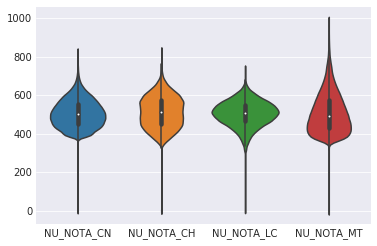

In [57]:
#Fazendo ViolinPlot das notas por escola
ax = sns.violinplot(data=grades)
plt.show()

In [37]:
#Separando notas baseados no tipo de escola que a pessoa estudou
grade_type_cols = grade_cols + ['TP_ESCOLA']
grades_type_school = educ[grade_type_cols]

tipo1 = grades_type_school[grades_type_school['TP_ESCOLA'] == 1].drop('TP_ESCOLA', axis=1)
tipo2 = grades_type_school[grades_type_school['TP_ESCOLA'] == 2].drop('TP_ESCOLA', axis=1)
tipo3 = grades_type_school[grades_type_school['TP_ESCOLA'] == 3].drop('TP_ESCOLA', axis=1)
tipo4 = grades_type_school[grades_type_school['TP_ESCOLA'] == 4].drop('TP_ESCOLA', axis=1)

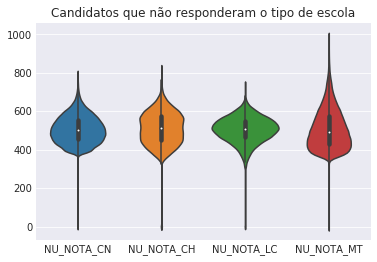

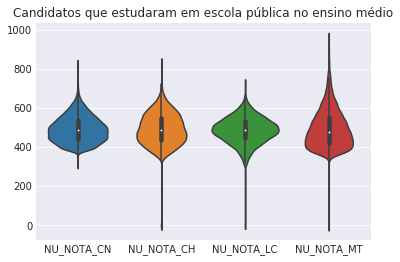

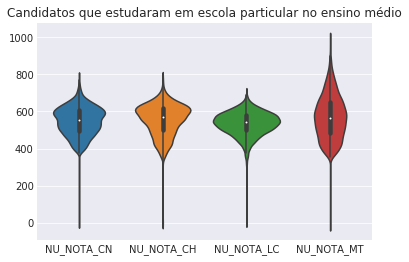

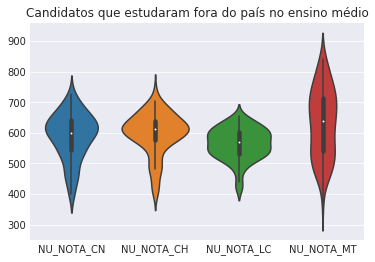

In [82]:
#ViolinPlot por tipo de escola que a pessoa estudou
size_plots = 0.5

plt.figure()
sns.violinplot(data=tipo1)
plt.title('Candidatos que não responderam o tipo de escola')

plt.figure()
sns.violinplot(data=tipo2)
plt.title('Candidatos que estudaram em escola pública no ensino médio')

plt.figure()
sns.violinplot(data=tipo3)
plt.title('Candidatos que estudaram em escola particular no ensino médio')

plt.figure()
sns.violinplot(data=tipo4)
plt.title('Candidatos que estudaram fora do país no ensino médio')

plt.subplots_adjust(
    hspace=0.5, wspace=0.5)
plt.show()